<h1 align=center><font size=6>Predicción del precio de un vehículo 🚗</font></h1>

<h2 align=center><font size=5>Laboratorio 2: Análisis Exploratorio</font></h2>

<h3><font size=3>Objetivos: </p></p>
    - Determinar cuáles son las caracteristicas principales que más impactan en el precio de un coche</font></h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
cars = pd.read_csv("data_wrangling.csv")
cars.head(5)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450,13.055556,10.681818,Low,0,1,1,0


## Análisis de variables numéricas continuas

**Correlación de Pearson:** mide la dependencia lineal entre dos variables X e Y. El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

* 1: correlación lineal positiva total.

* 0: Sin correlación lineal, las dos variables probablemente no se afectan entre sí.

* -1: correlación lineal negativa total.

**Valor p:** es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significancia de 0.05, lo que significa que estamos 95% seguros de que la correlación entre las variables es significativa. Por convención, cuando:

* p es  <  0.001 decimos que hay pruebas sólidas de que la correlación es significativa.
* p es  < 0.05: existe evidencia moderada de que la correlación es significativa.
* p es  < 0.1: existe evidencia débil de que la correlación es significativa.
* p es  >  0.1: no hay evidencia de que la correlación sea significativa.

In [4]:
cars.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279739,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239544,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360301,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285973,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245803,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309971,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279360,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256734,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267395,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063577,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


**Variables con correlación positiva:**

    - bore:0.54
    - wheel-base: 0.58
    - length: 0.69
    - width: 0.75
    - curb-weight: 0.83
    - engine-size: 0.87
    - horsepower: 0.80

**Variables con correlación negativa:**

    - city-mpg: -0.68
    - highway-mpg: -0.70


### - Bore vs Price

In [5]:
pearson_coef, p_value = stats.pearsonr(cars["bore"], cars["price"])
print("coeficiente de pearson:", pearson_coef, "valor p:", p_value)

coeficiente de pearson: 0.5431553832626604 valor p: 8.049189483935032e-17


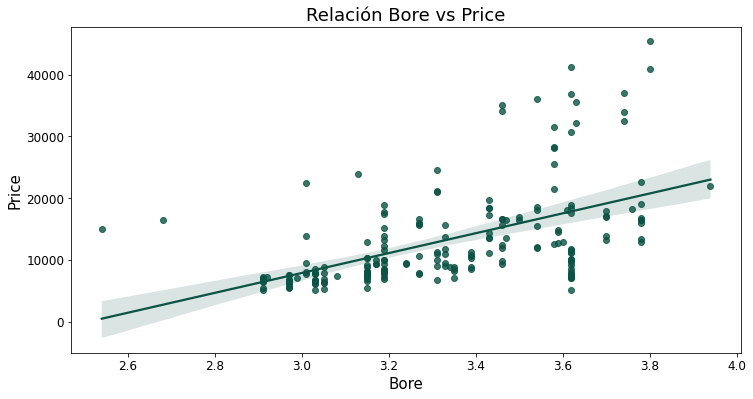

In [7]:
sns.regplot(x="bore", y="price", data=cars, color="#0B5345")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title ("Relación Bore vs Price", size=18)
plt.xlabel("Bore", size=15)
plt.ylabel("Price", size=15)
plt.rcParams["figure.figsize"] = (12, 6)
plt.savefig("borevsprice.jpg")

### - Wheel-base vs Price

In [8]:
pearson_coef, p_value = stats.pearsonr(cars["wheel-base"], cars["price"])
print("coeficiente de pearson:", pearson_coef, "valor p:", p_value)

coeficiente de pearson: 0.5846418222655083 valor p: 8.076488270732873e-20


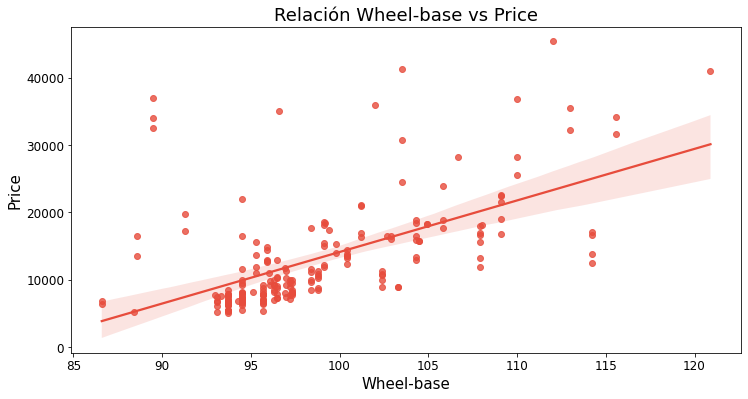

In [10]:
sns.regplot(x="wheel-base", y="price", data=cars, color="#E74C3C")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title ("Relación Wheel-base vs Price", size=18)
plt.xlabel("Wheel-base", size=15)
plt.ylabel("Price", size=15)
plt.rcParams["figure.figsize"] = (12, 6)
plt.savefig("wheel-basevsprice.jpg")

### - Length vs Price

In [8]:
pearson_coef, p_value = stats.pearsonr(cars["length"], cars["price"])
print("coeficiente de pearson:", pearson_coef, "valor p:", p_value)

coeficiente de pearson: 0.6906283804483644 valor p: 8.016477466158188e-30


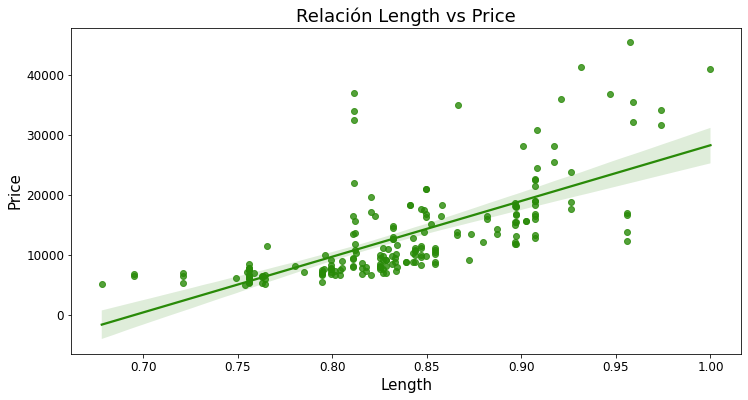

In [9]:
sns.regplot(x="length", y="price", data=cars, color="#298A08")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title ("Relación Length vs Price", size=18)
plt.xlabel("Length", size=15)
plt.ylabel("Price", size=15)
plt.rcParams["figure.figsize"] = (12, 6)
plt.savefig("lengthvsprice.jpg")

### - Width vs Price

In [10]:
pearson_coef, p_value = stats.pearsonr(cars["width"], cars["price"])
print("coeficiente de pearson:", pearson_coef, "valor p:", p_value)

coeficiente de pearson: 0.7512653440522665 valor p: 9.200335510484131e-38


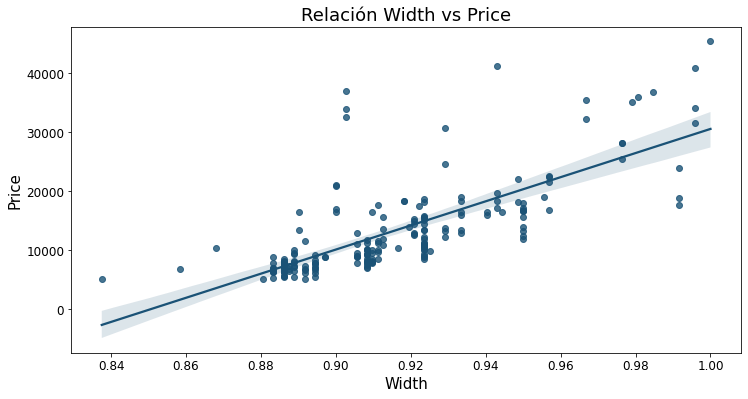

In [11]:
sns.regplot(x="width", y="price", data=cars, color="#1A5276")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title ("Relación Width vs Price", size=18)
plt.xlabel("Width", size=15)
plt.ylabel("Price", size=15)
plt.rcParams["figure.figsize"] = (12, 6)
plt.savefig("widthvsprice.jpg")

### - Curb-weight vs Price

In [12]:
pearson_coef, p_value = stats.pearsonr(cars["curb-weight"], cars["price"])
print("coeficiente de pearson:", pearson_coef, "valor p:", p_value)

coeficiente de pearson: 0.8344145257702849 valor p: 2.1895772388933803e-53


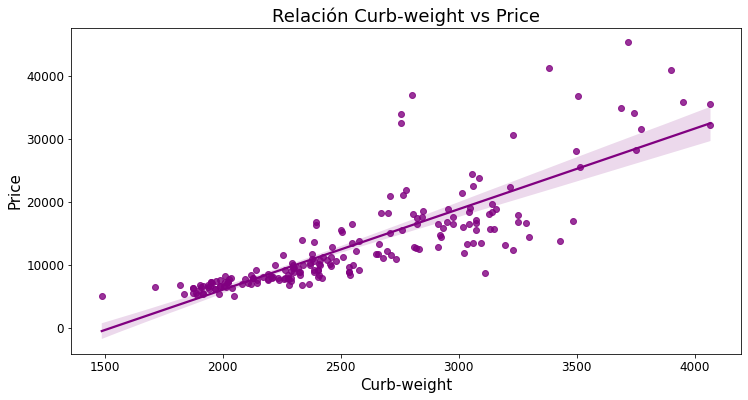

In [13]:
sns.regplot(x="curb-weight", y="price", data=cars, color="#800080")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title ("Relación Curb-weight vs Price", size=18)
plt.xlabel("Curb-weight", size=15)
plt.ylabel("Price", size=15)
plt.rcParams["figure.figsize"] = (12, 6)
plt.savefig("curb-weightvsprice.jpg")

### - Engine-size vs Price

In [14]:
pearson_coef, p_value = stats.pearsonr(cars["engine-size"], cars["price"])
print("coeficiente de pearson:", pearson_coef, "valor p:", p_value)

coeficiente de pearson: 0.8723351674455185 valor p: 9.265491622198389e-64


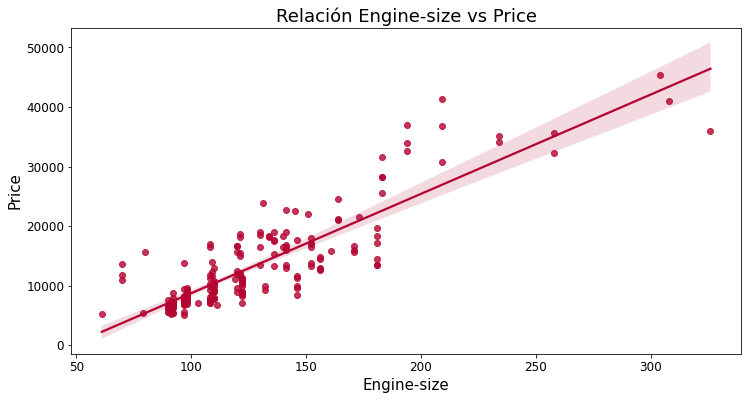

In [15]:
sns.regplot(x="engine-size", y="price", data=cars, color="#B40431")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title ("Relación Engine-size vs Price", size=18)
plt.xlabel("Engine-size", size=15)
plt.ylabel("Price", size=15)
plt.rcParams["figure.figsize"] = (12, 6)
plt.savefig("engine-sizevsprice.jpg")

### - Horsepower vs Price

In [16]:
pearson_coef, p_value = stats.pearsonr(cars["horsepower"], cars["price"])
print("coeficiente de pearson:", pearson_coef, "valor p:", p_value)

coeficiente de pearson: 0.8096068016571052 valor p: 6.273536270650862e-48


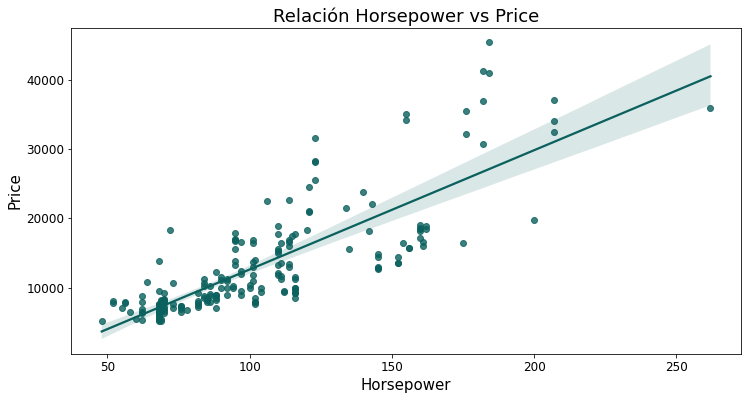

In [17]:
sns.regplot(x="horsepower", y="price", data=cars, color="#0B615E")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title ("Relación Horsepower vs Price", size=18)
plt.xlabel("Horsepower", size=15)
plt.ylabel("Price", size=15)
plt.rcParams["figure.figsize"] = (12, 6)
plt.savefig("horsepowervsprice.jpg")

### - City-mpg vs Price

In [18]:
pearson_coef, p_value = stats.pearsonr(cars["city-mpg"], cars["price"])
print("coeficiente de pearson:", pearson_coef, "valor p:", p_value)

coeficiente de pearson: -0.6865710067844681 valor p: 2.3211320655673773e-29


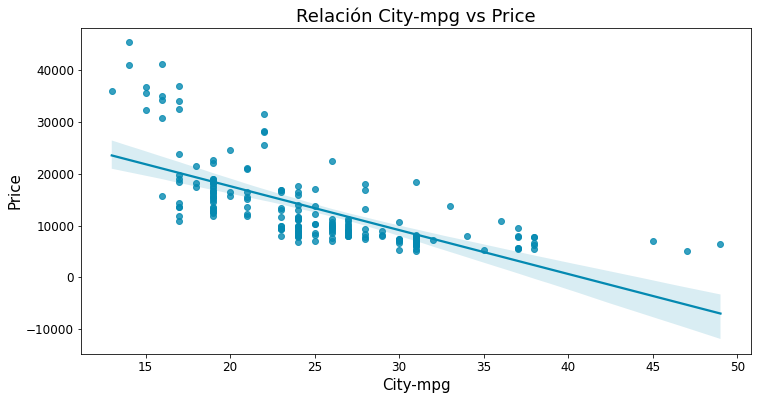

In [19]:
sns.regplot(x="city-mpg", y="price", data=cars, color="#0489B1")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title ("Relación City-mpg vs Price", size=18)
plt.xlabel("City-mpg", size=15)
plt.ylabel("Price", size=15)
plt.rcParams["figure.figsize"] = (12, 6)
plt.savefig("city-mpgvsprice.jpg")

### - Highway-mpg vs Price

In [20]:
pearson_coef, p_value = stats.pearsonr(cars["highway-mpg"], cars["price"])
print("coeficiente de pearson:", pearson_coef, "valor p:", p_value)

coeficiente de pearson: -0.7046922650589533 valor p: 1.7495471144474617e-31


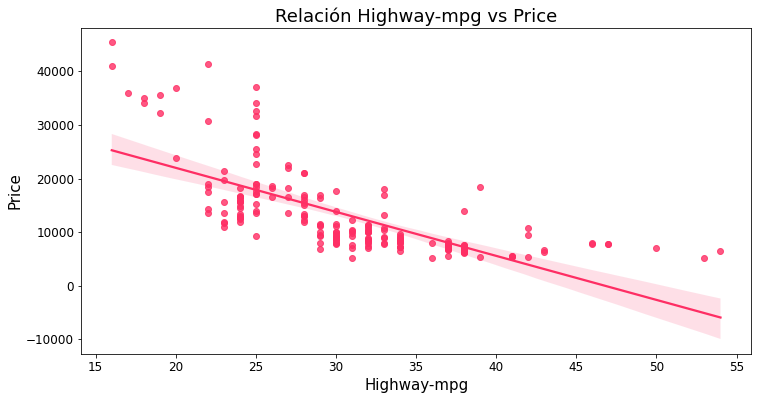

In [21]:
sns.regplot(x="highway-mpg", y="price", data=cars, color="#FE2E64")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title ("Relación Highway-mpg vs Price", size=18)
plt.xlabel("Highway-mpg", size=15)
plt.ylabel("Price", size=15)
plt.rcParams["figure.figsize"] = (12, 6)
plt.savefig("highway-mpgvsprice.jpg")

### - City-L/100km vs Price

In [22]:
pearson_coef, p_value = stats.pearsonr(cars["city-L/100km"], cars["price"])
print("coeficiente de pearson:", pearson_coef, "valor p:", p_value)

coeficiente de pearson: 0.7898975136626947 valor p: 3.9031064009390813e-44


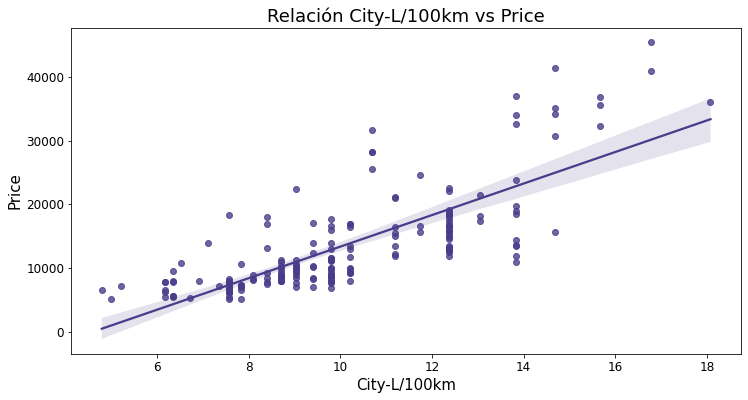

In [23]:
sns.regplot(x="city-L/100km", y="price", data=cars, color="#483D8B")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title ("Relación City-L/100km vs Price", size=18)
plt.xlabel("City-L/100km", size=15)
plt.ylabel("Price", size=15)
plt.rcParams["figure.figsize"] = (12, 6)
plt.savefig("city-L100kmvsprice.jpg")

### - Highway-L/100km vs Price

In [24]:
pearson_coef, p_value = stats.pearsonr(cars["highway-L/100km"], cars["price"])
print("coeficiente de pearson:", pearson_coef, "valor p:", p_value)

coeficiente de pearson: 0.8011176263981971 valor p: 3.0467845810418893e-46


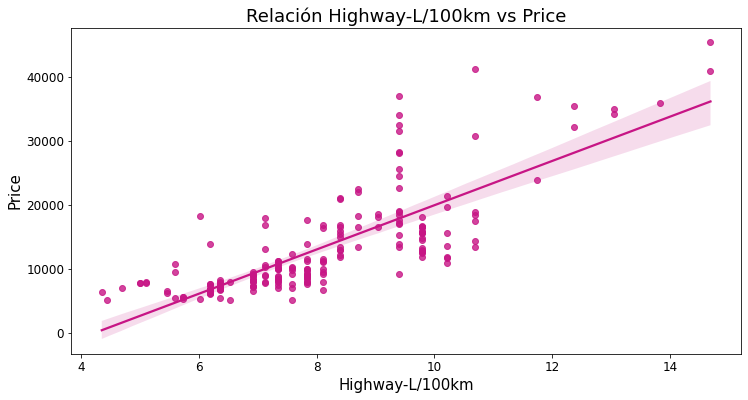

In [25]:
sns.regplot(x="highway-L/100km", y="price", data=cars, color="#C71585")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title ("Relación Highway-L/100km vs Price", size=18)
plt.xlabel("Highway-L/100km", size=15)
plt.ylabel("Price", size=15)
plt.rcParams["figure.figsize"] = (12, 6)
plt.savefig("highway-L100kmvsprice.jpg")

## Análisis de variables catégoricas

Una buena forma de visualizar variables categóricas es mediante el uso de diagramas de caja.

### - Body-style vs Price

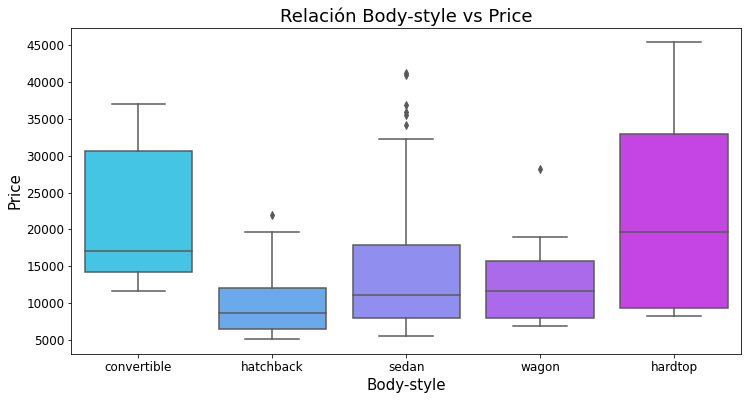

In [26]:
sns.boxplot(x="body-style", y="price", data=cars, palette="cool")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title ("Relación Body-style vs Price", size=18)
plt.xlabel("Body-style", size=15)
plt.ylabel("Price", size=15)
plt.rcParams["figure.figsize"] = (12, 6)
plt.savefig("body-stylevsprice.jpg")

### - Engine-location vs Price

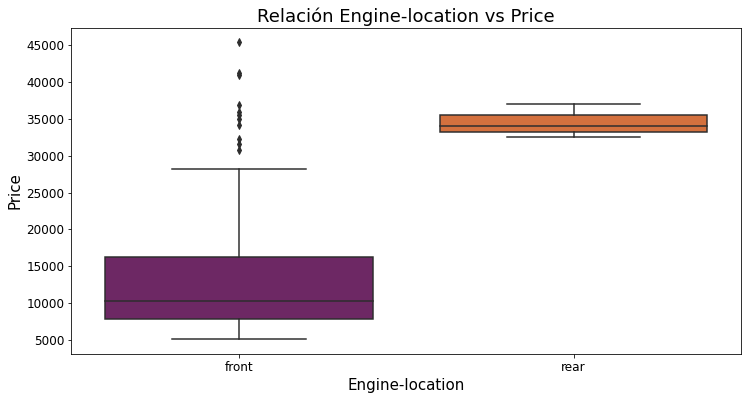

In [27]:
sns.boxplot(x="engine-location", y="price", data=cars, palette="inferno")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title ("Relación Engine-location vs Price", size=18)
plt.xlabel("Engine-location", size=15)
plt.ylabel("Price", size=15)
plt.rcParams["figure.figsize"] = (12, 6)
plt.savefig("engine-locationvsprice.jpg")

### - Drive-wheels vs Price

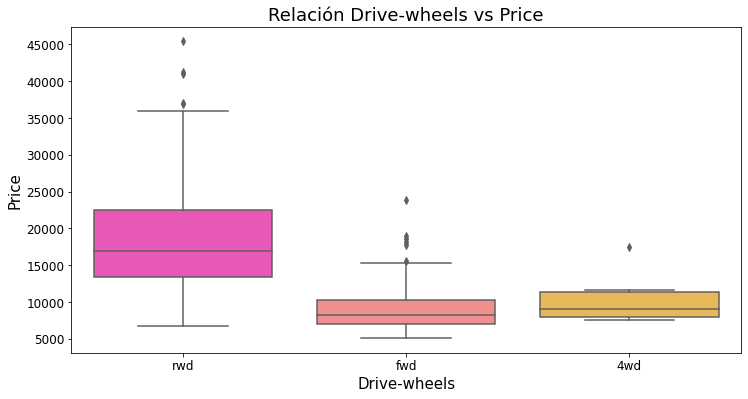

In [28]:
sns.boxplot(x="drive-wheels", y="price", data=cars, palette="spring")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title ("Relación Drive-wheels vs Price", size=18)
plt.xlabel("Drive-wheels", size=15)
plt.ylabel("Price", size=15)
plt.rcParams["figure.figsize"] = (12, 6)
plt.savefig("drive-wheelsvsprice.jpg")

## Análisis Estadístico Descriptivo

In [29]:
cars.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.661692,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113747,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.000000,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [30]:
cars.describe(include="object")

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


## Conclusiones

**Variables númericas de correlación positiva:**

    - Bore: es estadísticamente significativa y la correlación con la variable precio es moderada (0.54)
    - Wheel-base: es estadísticamente significativa y la correlación con la variable precio es moderada (0.58)
    - Length: es estadísticamente significativa y la correlación con la variable precio es moderadamente fuerte (0.69)
    - Width: es estadísticamente significativa y la correlación con la variable precio es fuerte (0.75)
    - Curb-weight: es estadísticamente significativa y la correlación con la variable precio es fuerte (0.83)
    - Engine-size: es estadísticamente significativa y la correlación con la variable precio es fuerte (0.87)
    - Horsepower: es estadísticamente significativa y la correlación con la variable precio es fuerte (0.87)

**Variables númericas de correlación positiva:**

     - City-mpg: es estadísticamente significativa y la correlación con la variable precio es moderadamente fuerte (-0.68)
     - Highway-mpg: es estadísticamente significativa y la correlación con la variable precio es fuerte (-0.70)

   **Nota:** Al analizar la correlación entre las viables métricas City y Highway en L/100Km la correlación da positiva.

**Variables catégoricas:**

    - Drive-wheels: la distribución de precios entre las diferentes categorías de drive-wheels es diferente; por tanto, esta variable es buena predictora del precio.
    - Las variables body-style y engine-location no son unas buenas predictoras del precio ya que, las distribución de precios entre las diferentes categorías de la primera tienen una superposición significativa y, la distribución de precios entre las diferentes categorías de la segunda son demasiado distintas. 
    
    
 